<div style="text-align: center;">
    <a href="https://www.dataia.eu/">
        <img border="0" src="https://github.com/ramp-kits/template-kit/raw/main/img/DATAIA-h.png" width="90%">
    </a>
</div>


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from category_encoders.target_encoder import TargetEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('data/s_ben_dep.csv', delimiter=';')

In [3]:
df.head()

,Date référence,Numéro département,Nom département,Numéro région,Nom région,Nombre foyers NDUR,Nombre personnes NDUR,Montant total NDUR,Nombre foyers NDURPAJE,Nombre personnes NDURPAJE,...,Nombre foyers AMI,Nombre personnes AMI,Montant total AMI,Nombre foyers ADI,Nombre personnes ADI,Montant total ADI,Nombre foyers CDI,Nombre personnes CDI,Montant total CDI,Lieu résidence
0,2023-02,66,PYRENEES ORIENTALES,76,OCCITANIE,112823,239125,59675313.0,11946,43739,...,1,1,216.0,45,191,51688.0,2,5,675.0,OCCITANIE/PYRENEES ORIENTALES
1,2023-02,71,SAONE ET LOIRE,27,BOURGOGNE FRANCHE COMTE,96411,231828,44442888.0,13530,51608,...,0,0,0.0,4,17,1212.0,0,0,0.0,BOURGOGNE FRANCHE COMTE/SAONE ET LOIRE
2,2023-02,80,SOMME,32,HAUTS DE FRANCE,122186,274684,58127867.0,15013,56815,...,1,1,15.0,1,4,536.0,0,0,0.0,HAUTS DE FRANCE/SOMME
3,2023-02,XX,NaN,XX,NaN,34,107,16144.0,8,35,...,0,0,0.0,0,0,0.0,0,0,0.0,NaN
4,2023-01,06,ALPES MARITIMES,93,PROVENCE ALPES COTE D AZUR,218990,488046,94481161.0,25222,92437,...,39,41,4903.0,692,2503,870504.0,3,10,1275.0,PROVENCE ALPES COTE D AZUR/ALPES MARITIMES


In [4]:
df.columns

Index(['Date référence', 'Numéro département', 'Nom département',
       'Numéro région', 'Nom région', 'Nombre foyers NDUR',
       'Nombre personnes NDUR', 'Montant total NDUR', 'Nombre foyers NDURPAJE',
       'Nombre personnes NDURPAJE', 'Montant total NDURPAJE',
       'Nombre foyers PN', 'Nombre personnes PN', 'Montant total PN',
       'Nombre foyers AB', 'Nombre personnes AB', 'Montant total AB',
       'Nombre foyers CMG', 'Nombre personnes CMG', 'Montant total CMG',
       'Nombre foyers PREPARE', 'Nombre personnes PREPARE',
       'Montant total PREPARE', 'Nombre foyers NDUREJ',
       'Nombre personnes NDUREJ', 'Montant total NDUREJ', 'Nombre foyers AF',
       'Nombre personnes AF', 'Montant total AF', 'Nombre foyers CF',
       'Nombre personnes CF', 'Montant total CF', 'Nombre foyers ARS',
       'Nombre personnes ARS', 'Montant total ARS', 'Nombre foyers ASF',
       'Nombre personnes ASF', 'Montant total ASF', 'Nombre foyers NDURHD',
       'Nombre personnes NDURHD', '

In [5]:
print(df.shape)
df.head()
df.dtypes
df.describe()

(10636, 94)


,Nombre foyers NDUR,Nombre personnes NDUR,Montant total NDUR,Nombre foyers NDURPAJE,Nombre personnes NDURPAJE,Montant total NDURPAJE,Nombre foyers PN,Nombre personnes PN,Montant total PN,Nombre foyers AB,...,Montant total NDURINT,Nombre foyers AMI,Nombre personnes AMI,Montant total AMI,Nombre foyers ADI,Nombre personnes ADI,Montant total ADI,Nombre foyers CDI,Nombre personnes CDI,Montant total CDI
count,10636.000000,1.063600e+04,1.063600e+04,10636.000000,10636.000000,1.063600e+04,10636.000000,10636.000000,1.063600e+04,10636.000000,...,1.063600e+04,10636.000000,10636.000000,10636.000000,10636.000000,10636.000000,1.063600e+04,10636.000000,10636.000000,10636.000000
mean,122702.310737,2.995857e+05,5.507421e+07,18029.610004,68212.221512,5.995905e+06,413.283001,1586.291463,4.028652e+05,14183.300771,...,5.427785e+04,28.967187,31.077755,3231.619218,67.955434,257.102388,4.845458e+04,4.513163,14.419519,2591.641407
std,111295.118231,2.705477e+05,5.221588e+07,16904.561286,64294.877005,9.799244e+06,393.458163,1526.752513,3.820623e+05,13162.395164,...,1.844785e+05,112.987136,119.441126,13657.412235,234.877731,905.016975,1.828791e+05,33.427157,106.006562,21194.989110
min,1.000000,1.000000e+00,1.700000e+01,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,43328.750000,1.044480e+05,1.893193e+07,6303.750000,23710.750000,2.167007e+06,140.000000,534.000000,1.362760e+05,4924.500000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
50%,94751.500000,2.223870e+05,4.067250e+07,12817.000000,49653.000000,4.482177e+06,296.000000,1115.000000,2.889765e+05,10418.500000,...,1.646000e+03,1.000000,1.000000,115.000000,1.000000,5.000000,5.100000e+02,0.000000,0.000000,0.000000
75%,155708.250000,3.956358e+05,6.866371e+07,22936.250000,87921.250000,7.863627e+06,535.000000,2064.250000,5.204935e+05,18307.250000,...,1.112100e+04,7.000000,8.000000,830.500000,7.000000,26.000000,4.707000e+03,2.000000,6.000000,709.250000
max,625009.000000,1.472208e+06,8.304413e+08,210214.000000,490579.000000,7.455722e+08,2522.000000,9801.000000,2.378648e+06,80044.000000,...,2.243209e+06,1084.000000,1164.000000,143632.000000,2587.000000,11208.000000,2.239997e+06,451.000000,1410.000000,343682.000000


In [6]:
print("Missing values before imputation:")
print(df.isnull().sum())

Missing values before imputation:
Date référence            0
Numéro département        0
Nom département         225
Numéro région             0
Nom région              324
                       ... 
Montant total ADI         0
Nombre foyers CDI         0
Nombre personnes CDI      0
Montant total CDI         0
Lieu résidence          324
Length: 94, dtype: int64


In [7]:
categorical_cols = df.select_dtypes(exclude=['number']).columns.tolist()

numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

print("\nCategorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

knn_imputer = KNNImputer(n_neighbors=5)
df[numerical_cols] = knn_imputer.fit_transform(df[numerical_cols])

cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

print("\nMissing values after imputation:")
print(df.isnull().sum())


Categorical columns: ['Date référence', 'Numéro département', 'Nom département', 'Numéro région', 'Nom région', 'Lieu résidence']
Numerical columns: ['Nombre foyers NDUR', 'Nombre personnes NDUR', 'Montant total NDUR', 'Nombre foyers NDURPAJE', 'Nombre personnes NDURPAJE', 'Montant total NDURPAJE', 'Nombre foyers PN', 'Nombre personnes PN', 'Montant total PN', 'Nombre foyers AB', 'Nombre personnes AB', 'Montant total AB', 'Nombre foyers CMG', 'Nombre personnes CMG', 'Montant total CMG', 'Nombre foyers PREPARE', 'Nombre personnes PREPARE', 'Montant total PREPARE', 'Nombre foyers NDUREJ', 'Nombre personnes NDUREJ', 'Montant total NDUREJ', 'Nombre foyers AF', 'Nombre personnes AF', 'Montant total AF', 'Nombre foyers CF', 'Nombre personnes CF', 'Montant total CF', 'Nombre foyers ARS', 'Nombre personnes ARS', 'Montant total ARS', 'Nombre foyers ASF', 'Nombre personnes ASF', 'Montant total ASF', 'Nombre foyers NDURHD', 'Nombre personnes NDURHD', 'Montant total NDURHD', 'Nombre foyers AAH', 

In [8]:
df.duplicated().sum()

np.int64(0)

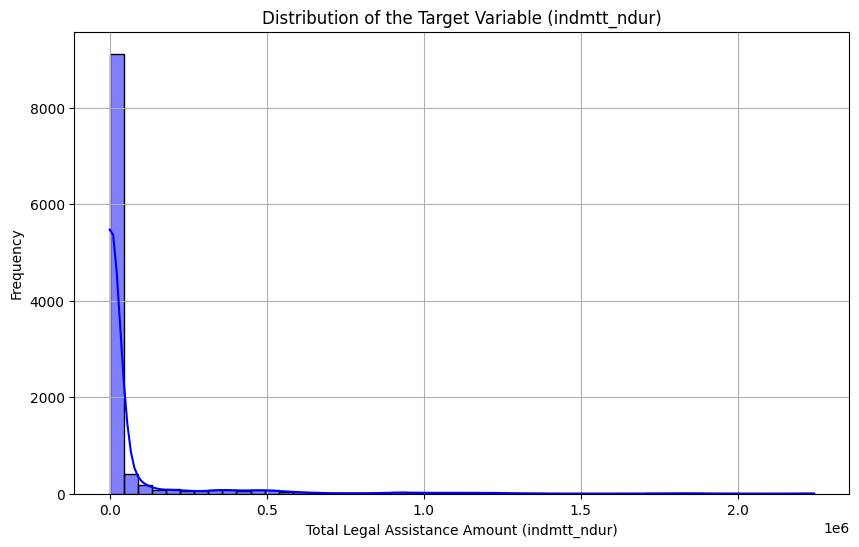

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Montant total NDURINT'], bins=50, kde=True, color='blue')
plt.xlabel("Total Legal Assistance Amount (indmtt_ndur)")
plt.ylabel("Frequency")
plt.title("Distribution of the Target Variable (indmtt_ndur)")
plt.grid(True)
plt.show()

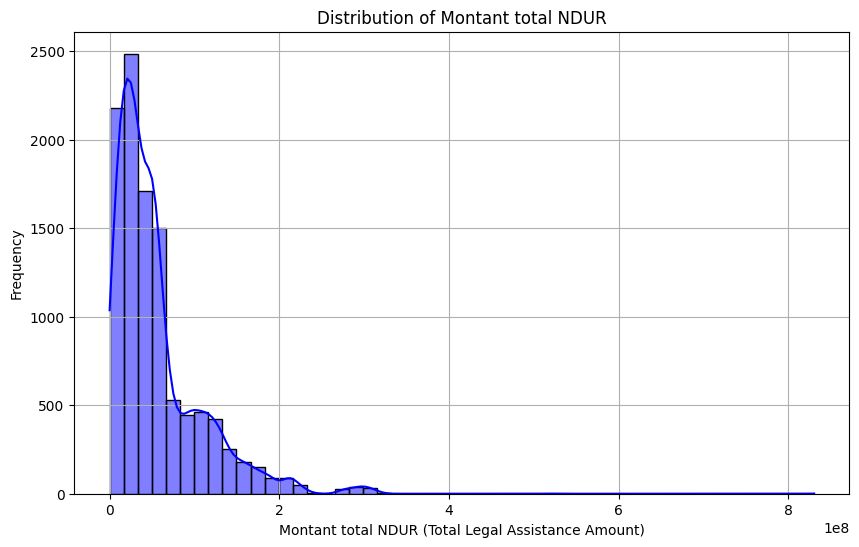

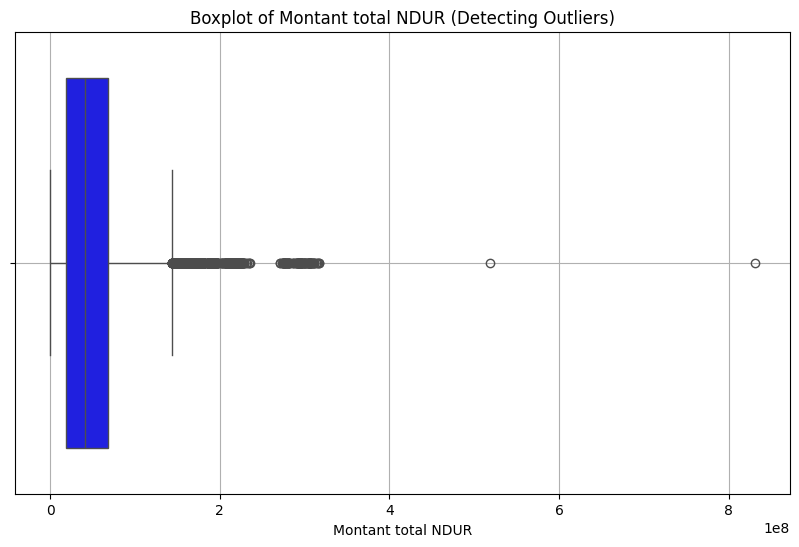

C:\Users\LEOPARD\AppData\Local\Temp\ipykernel_21012\3374939428.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.groupby("Nom région")["Montant total NDUR"].mean().index,


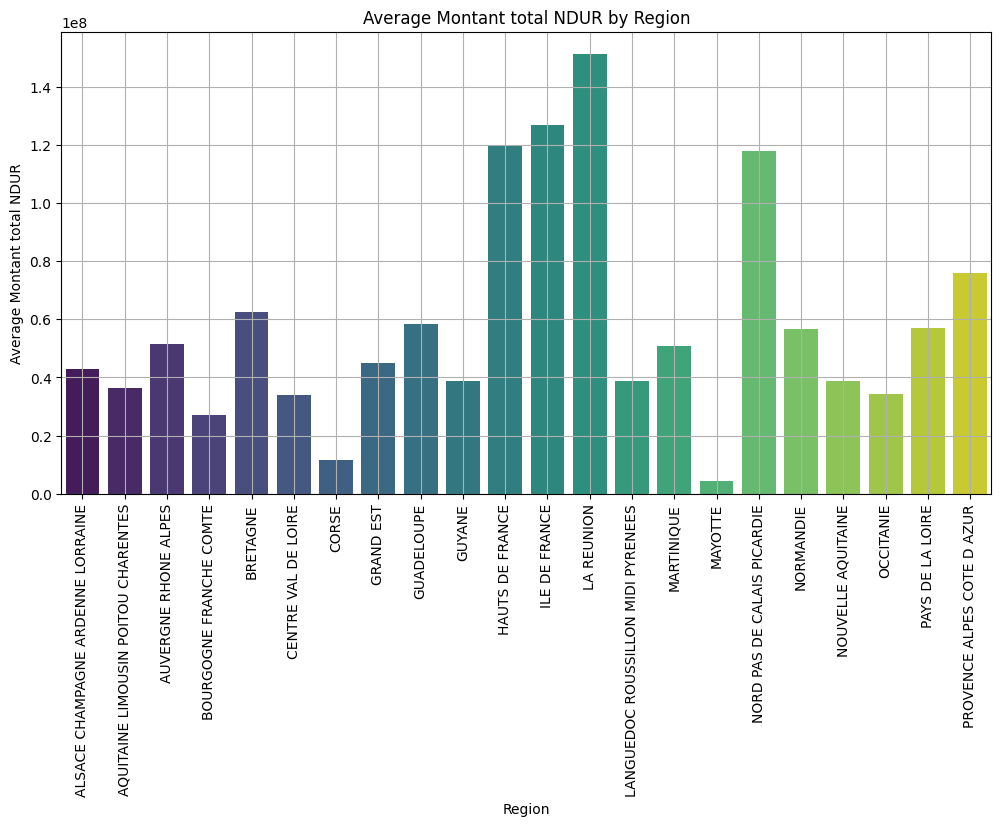

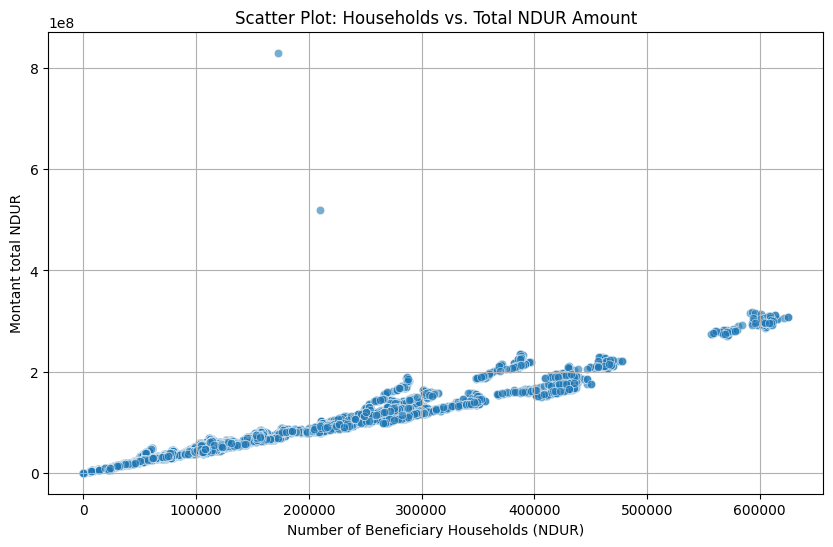

In [11]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(exclude=['number']).columns.tolist()

plt.figure(figsize=(10, 6))
sns.histplot(df["Montant total NDUR"], bins=50, kde=True, color='blue')
plt.xlabel("Montant total NDUR (Total Legal Assistance Amount)")
plt.ylabel("Frequency")
plt.title("Distribution of Montant total NDUR")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df["Montant total NDUR"], color='blue')
plt.xlabel("Montant total NDUR")
plt.title("Boxplot of Montant total NDUR (Detecting Outliers)")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=df.groupby("Nom région")["Montant total NDUR"].mean().index,
            y=df.groupby("Nom région")["Montant total NDUR"].mean().values,
            palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Region")
plt.ylabel("Average Montant total NDUR")
plt.title("Average Montant total NDUR by Region")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Nombre foyers NDUR"], y=df["Montant total NDUR"], alpha=0.6)
plt.xlabel("Number of Beneficiary Households (NDUR)")
plt.ylabel("Montant total NDUR")
plt.title("Scatter Plot: Households vs. Total NDUR Amount")
plt.grid(True)
plt.show()


In [12]:
numerical_data = df.select_dtypes(include=['number'])

Q1 = numerical_data.quantile(0.25)
Q3 = numerical_data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((numerical_data < lower_bound) | (numerical_data > upper_bound)).any(axis=1)

numerical_data_cleaned = numerical_data[~outliers]

In [13]:
categorical_data = df.select_dtypes(exclude=['number'])
categorical_data_cleaned = categorical_data[~outliers]
df_final_cleaned = pd.concat([numerical_data_cleaned, categorical_data_cleaned], axis=1)

In [14]:
df_final_cleaned.shape

(5123, 94)

In [15]:
categorical_cols = df_final_cleaned.select_dtypes(exclude=['number']).columns.tolist()

target_encoder = TargetEncoder(cols=categorical_cols)
df_final_cleaned[categorical_cols] = target_encoder.fit_transform(df_final_cleaned[categorical_cols], df_final_cleaned['Montant total NDURINT'])

df_final_cleaned.head()

,Nombre foyers NDUR,Nombre personnes NDUR,Montant total NDUR,Nombre foyers NDURPAJE,Nombre personnes NDURPAJE,Montant total NDURPAJE,Nombre foyers PN,Nombre personnes PN,Montant total PN,Nombre foyers AB,...,Montant total ADI,Nombre foyers CDI,Nombre personnes CDI,Montant total CDI,Date référence,Numéro département,Nom département,Numéro région,Nom région,Lieu résidence
1,96411.0,231828.0,44442888.0,13530.0,51608.0,4880361.0,299.0,1155.0,303706.0,10080.0,...,1212.0,0.0,0.0,0.0,1153.386539,2734.489441,2734.489441,2694.963504,2694.963504,2734.489441
2,122186.0,274684.0,58127867.0,15013.0,56815.0,5116509.0,362.0,1415.0,370299.0,11621.0,...,536.0,0.0,0.0,0.0,1153.386539,631.582676,631.582676,1319.221647,1390.918467,675.395441
3,34.0,107.0,16144.0,8.0,35.0,6366.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,1153.386539,1.021827,0.000042,0.152940,1098.874864,0.000042
5,59573.0,142290.0,26384911.0,7906.0,29644.0,2740040.0,164.0,630.0,166483.0,6192.0,...,777.0,0.0,0.0,0.0,1131.418226,378.962434,378.962434,1144.650273,1144.650273,378.962434
6,130490.0,295483.0,54290347.0,16277.0,61208.0,5942634.0,356.0,1375.0,367272.0,12075.0,...,1464.0,0.0,0.0,0.0,1131.418226,1106.686070,1106.686070,940.356250,940.356250,1106.686070


In [16]:
df_final_cleaned.shape

(5123, 94)

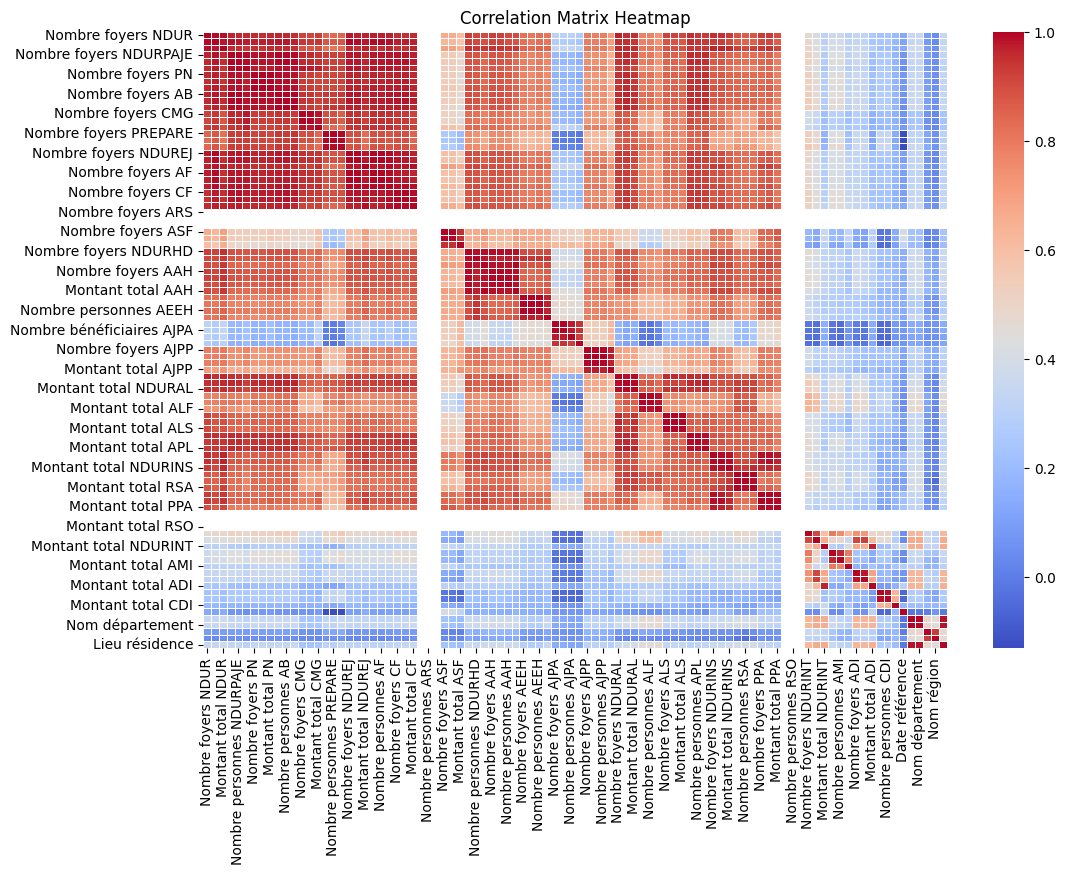

In [17]:
correlation_matrix = df_final_cleaned.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [18]:
correlation_threshold = 0.9

corr_pairs = correlation_matrix.drop(index=['Montant total NDURINT'], columns=['Montant total NDURINT']).abs()
upper_tri = corr_pairs.where(np.triu(np.ones(corr_pairs.shape), k=1).astype(bool))

high_corr_features = [column for column in upper_tri.columns if any(upper_tri[column] > correlation_threshold)]

df_reduced = df_final_cleaned.drop(columns=high_corr_features)

print(f"Removed {len(high_corr_features)} highly correlated features")
df_reduced.head()

df_reduced.columns

Removed 73 highly correlated features


Index(['Nombre foyers NDUR', 'Nombre foyers ARS', 'Nombre personnes ARS',
       'Montant total ARS', 'Nombre foyers ASF', 'Nombre foyers AJPA',
       'Nombre foyers AJPP', 'Nombre foyers ALF', 'Nombre foyers RSO',
       'Nombre personnes RSO', 'Montant total RSO', 'Nombre foyers NDURINT',
       'Montant total NDURINT', 'Nombre foyers AMI', 'Montant total AMI',
       'Montant total ADI', 'Nombre foyers CDI', 'Montant total CDI',
       'Date référence', 'Numéro département', 'Numéro région'],
      dtype='object')

In [19]:
df_reduced.shape

(5123, 21)

In [20]:
y = df_final_cleaned['Montant total NDURINT']
X = df_final_cleaned.drop(columns=['Montant total NDURINT'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

In [21]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

performance_metrics = pd.DataFrame({
    "Metric": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)"],
    "Value": [mae, mse, rmse]
})

In [22]:
print(performance_metrics)

                           Metric     Value
0       Mean Absolute Error (MAE)  0.155724
1        Mean Squared Error (MSE)  0.110178
2  Root Mean Squared Error (RMSE)  0.331930


In [23]:
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)
xgb_model = XGBRegressor(n_estimators=1000, random_state=42, objective='reg:squarederror')

rf_model.fit(X_train_scaled, y_train)
xgb_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_xgb = xgb_model.predict(X_test_scaled)

In [24]:
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return [mae, mse, rmse]

rf_metrics = evaluate_model(y_test, y_pred_rf)
xgb_metrics = evaluate_model(y_test, y_pred_xgb)

performance_comparison = pd.DataFrame({
    "Metric": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)"],
    "Random Forest": rf_metrics,
    "XGBoost": xgb_metrics
})

In [25]:
print(performance_comparison)

                           Metric  Random Forest      XGBoost
0       Mean Absolute Error (MAE)      29.249058    23.340868
1        Mean Squared Error (MSE)    8218.625788  4988.565177
2  Root Mean Squared Error (RMSE)      90.656637    70.629775


## Submission format

### Pipeline

In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


def get_estimator():
    """Define preprocessing and a regression model for legal assistance cost prediction."""
    
    numerical_features = [
        "Nombre foyers NDUR", "Nombre foyers ARS", "Nombre personnes ARS",
        "Montant total ARS", "Nombre foyers ASF", "Nombre foyers AJPA",
        "Nombre foyers AJPP", "Nombre foyers ALF", "Nombre foyers RSO",
        "Nombre personnes RSO", "Montant total RSO", "Nombre foyers NDURINT", "Nombre foyers AMI", "Montant total AMI",
        "Montant total ADI", "Nombre foyers CDI", "Montant total CDI"
    ]
    
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), numerical_features),
        ],
        remainder="drop"
    )

    model = XGBRegressor(n_estimators=1000, random_state=42, objective='reg:squarederror')

    pipeline = make_pipeline(preprocessor, model)

    return pipeline


## Submission

To submit your code, you can refer to the <a href="https://paris-saclay-cds.github.io/ramp-docs/ramp-workflow/stable/using_kits.html">online documentation<a>

In [27]:
!ramp-test --submission starting_kit

Testing Predicting Legal Assistance Costs
Reading train and test files from ./data/ ...
Reading cv ...
Training submissions\starting_kit ...
CV fold 0
	score       rmse      time
	train    35.6071  1.522762
	valid  4266.8094  0.027794
	test   4960.2501  0.011539
CV fold 1
	score       rmse      time
	train    36.3742  1.585303
	valid  4209.5671  0.034714
	test   4002.2665  0.013687
CV fold 2
	score        rmse      time
	train      4.5082  1.406405
	valid  15784.5504  0.037147
	test   11574.3241  0.012721
CV fold 3
	score       rmse      time
	train    22.5925  1.329937
	valid  4571.5888  0.027700
	test   4500.0762  0.012389
CV fold 4
	score       rmse      time
	train     5.3857  1.621762
	valid  5113.6236  0.026684
	test   4715.2574  0.011332
----------------------------
Mean CV scores
----------------------------
	score                    rmse        time
	train        20.8935 ± 13.914  1.5 ± 0.11
	valid  6789.2279 ± 4509.07187   0.0 ± 0.0
	test   5950.4349 ± 2829.59925   0.0 ± 0.0
